# Analysis of Job Advertisements

> Data collected from [indeed](https://de.indeed.com/) contains searched position, original job title, company, location, full job description and date of scraping. The dataset includes jobs posted in the last quarter 2019 in Germany for data professionals.

In [1]:
import pandas as pd
import string

from langdetect import detect

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
%reload_ext version_information
%version_information nltk, sklearn, pandas, wordcloud, langdetect

Software versions
Python 3.7.5 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.10.2
OS Windows 10 10.0.18362 SP0
nltk 3.4.5
sklearn 0.22
pandas 0.25.3
wordcloud 1.6.0
langdetect 1.0.7
Thu Dec 26 10:17:58 2019 W. Europe Standard Time

In [3]:
# load data
df = pd.read_csv('./results/jobs_2019_12_de.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 7 columns):
jobkey         1380 non-null object
position       1380 non-null object
jobtitle       1380 non-null object
company        1379 non-null object
location       1380 non-null object
date           1380 non-null object
description    1380 non-null object
dtypes: object(7)
memory usage: 75.6+ KB


In [5]:
df.shape

(1380, 7)

In [6]:
df.head()

,jobkey,position,jobtitle,company,location,date,description
0,04f7e6866f4ecd3c,data analyst,Data Analyst (m/w/d) Analytics & Insights in K...,UNICEPTA GmbH,Köln,2019-12-23,Deine Aufgaben:\n Mit Deiner Arbeit bist Du ...
1,aafab2f520523f70,data analyst,Junior Data Analyst / Business Analyst (m/w/d),MDM Münzhandelsgesellschaft mbH & Co. KG Deuts...,Braunschweig,2019-12-23,Du hast eine Affinität zu Daten und Anal...
2,254cdf3d4ff122da,data analyst,(Senior) Data Analyst (f/m/d),Delivery Hero SE,Berlin,2019-12-23,Want to be a Hero? Join the #1 GLOBAL LEADE...
3,8662988dc325787b,data analyst,Data Analyst CRM (m/w/d),Peek&Cloppenburg KG,Hamburg,2019-12-23,Für unsere Zentrale in Hamburg such...
4,e63c1ce04889bdda,data analyst,Data Scientist* / Data Analyst* im Bereich Sta...,Stadtverwaltung Wolfsburg,Wolfsburg,2019-12-23,Stadt Wolfsburg \n Werden Sie Teil der E...


In [7]:
# Detect language for every job post
df["lang"] = df['description'].apply(detect)
lang = dict({'en':'english', 'de':'german'})
df["lang"] = df["lang"].map(lang)

In [8]:
# language of job posts in Germany (except Berlin)
df.loc[df['location']!='Berlin','lang'].value_counts(normalize=True)

german     0.730881
english    0.269119
Name: lang, dtype: float64

In [9]:
# job post in english/deutsch in Berlin
df.loc[df['location']=='Berlin','lang'].value_counts(normalize=True)

english    0.662824
german     0.337176
Name: lang, dtype: float64

In [10]:
plt.style.use('ggplot')

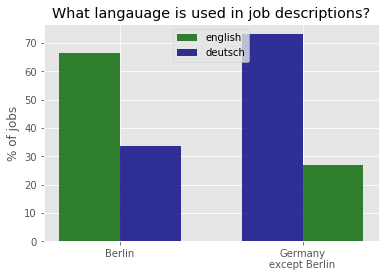

In [11]:
w = 1

plt.title("What langauage is used in job descriptions?")

plt.bar([1,1+w], df.loc[df['location']=='Berlin','lang'].value_counts(normalize=True)*100,
        width=w, color=['darkgreen', 'navy'], alpha=0.8, label='english')

plt.bar([1+3*w,1+4*w], df.loc[df['location']!='Berlin','lang'].value_counts(normalize=True)*100, 
        width=w, color=['navy', 'darkgreen'], alpha=0.8, label='deutsch')

plt.xticks([1+w/2, 1+3.5*w],['Berlin', 'Germany\nexcept Berlin'])
plt.ylabel('% of jobs')

plt.legend(loc='upper center')

plt.show()

> A majority of job advertisements in Berlin are in English, while in the rest of country German is used more frequently for job descriptions.

In [12]:
# number of companies
len(df.company.unique())

844

In [13]:
# exclude records with loc = 'Deutschland'
df = df.loc[df.location!='Deutschland', :]

In [14]:
# a number of different cities
len(df['location'].unique())

174

In [15]:
# a number of job positions in each city
positions_per_city = df.groupby(['location'])['jobtitle'].apply(len)
positions_per_city.sort_values(ascending=False)

location
Berlin               347
München              167
Hamburg              124
Frankfurt am Main     67
Köln                  61
                    ... 
Rostock                1
Rheinland-Pfalz        1
Jena                   1
Rheine                 1
Zirndorf               1
Name: jobtitle, Length: 174, dtype: int64

In [16]:
# a number of job positions in a city per a company

df.groupby(['location'])['company'].value_counts().sort_values(ascending=False)

location    company                        
Berlin      Zalando                            17
            Bayer                              16
Düsseldorf  trivago                            11
Berlin      Delivery Hero                      11
München     iPAXX                               8
                                               ..
Karlsruhe   edatasystems GmbH                   1
            United Internet Media GmbH          1
            United Internet AG                  1
            Sovendus GmbH                       1
Hamburg     Aequitas Software GmbH & Co. KG     1
Name: company, Length: 935, dtype: int64

In [17]:
# positions in Zalando, Berlin
df.loc[(df.location=='Berlin')&(df.company=='Zalando'),'jobtitle']

29                        Data Analyst - Client Reporting
165          Senior Data Analyst Markets - Zalando Lounge
171                                  Pricing Data Analyst
177      Data Analyst Finance Technology - Zalando Lounge
257                                   Senior Data Analyst
268     Data Analyst Category Controlling - Zalando Lo...
276                  Senior Data Analyst - Media Business
326     Senior Data Analyst Marketing Intelligence - Z...
531     Data Scientist - Machine Learning - Economics ...
806           (Senior) Data Scientist - Predictive Buying
1047    Data Engineer - Process Mining Consultant (m/f/d)
1054                                  Data Engineer - ZMS
1064                  Data Engineer - Content Attribution
1079                  Data Engineer - Markets Engineering
1144                 Senior Data Engineer - (Spark/Scala)
1195    (Senior) BI / Data Engineer - Category Management
1206    Data Engineer (Python/Java) - Retail Operation...
Name: jobtitle

In [18]:
# A number of different companies in cities that looks for data professionals

companies_per_city = df.groupby(['location'])['company'].unique().apply(len).sort_values(ascending=False).head(15)

In [19]:
companies_per_city

location
Berlin               211
München              108
Hamburg               93
Frankfurt am Main     50
Köln                  46
Düsseldorf            32
Stuttgart             23
Karlsruhe             19
Hannover              12
Essen                 10
Leipzig               10
Nürnberg               9
Bonn                   9
Oldenburg              7
Bremen                 7
Name: company, dtype: int64

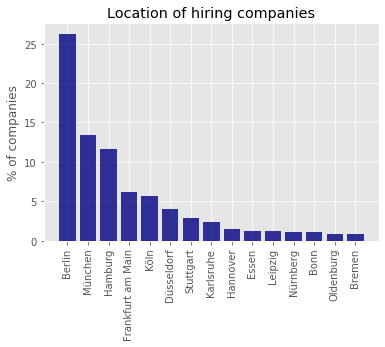

In [20]:
plt.bar(companies_per_city.index, companies_per_city/len(df.company.unique())*100, color='navy', alpha=0.8)
plt.title('Location of hiring companies')
plt.ylabel('% of companies')
plt.xticks(rotation=90)
plt.show()

> Berlin is a top city to find new opportunities for data professionals.

In [21]:
# searched positions
df.position.unique()

array(['data analyst', 'data scientist', 'data engineer',
       'business intelligence analyst', 'bi analyst'], dtype=object)

In [22]:
# replacement
df['position'].replace('business intelligence analyst', 'bi analyst', inplace=True)
df.position.value_counts()

data scientist    491
data engineer     385
data analyst      329
bi analyst         93
Name: position, dtype: int64

In [23]:
# Clean the text of job advertisments

df['description_cleaned'] = ''

# remove punctuation
df.loc[:,'description_cleaned'] = df['description'].str.replace('[{}]'.format(string.punctuation+'“'+'„'+'–'), '')

# convert to lower case
df.loc[:,'description_cleaned'] = df['description_cleaned'].str.lower()

# remove digits
df.loc[:,'description_cleaned'] = df['description_cleaned'].str.replace('[0-9]', '')

# remove extra white spaces in texts using split and join
df.loc[:, 'description_cleaned'] = df['description_cleaned'].apply(lambda s: ' '.join(s.split()))

In [24]:
# symbols in descriptions
df.description_cleaned.apply(len).describe()

count     1298.000000
mean      2655.994607
std       1025.206905
min        222.000000
25%       1929.500000
50%       2548.000000
75%       3254.000000
max      12702.000000
Name: description_cleaned, dtype: float64

In [25]:
# words in descriptions
df.description_cleaned.str.split().apply(len).describe()

count    1298.000000
mean      362.542373
std       152.484579
min        37.000000
25%       255.000000
50%       340.500000
75%       460.000000
max      1628.000000
Name: description_cleaned, dtype: float64

In [26]:
# Bag-of-words

# Define a corpus
corpus = df['description_cleaned']

# Remove stopwords
stop_words = stopwords.words(df['lang'].unique())
stop_words.extend(['tag', 'tagen', 'aufgaben', 'sowie'])

Bag-of-words model requires to specify the n-grams range. The n-grams represent the groups of n words, corresponding to the sequence of n consistently occuring words in a document. This sequence of n words is treated as pseudo-term.

In [27]:
vectorizer = CountVectorizer(
                             stop_words=stop_words, 
                             ngram_range=(1,1), 
                             analyzer='word', 
                             binary=True)

freq = vectorizer.fit_transform(corpus).toarray()
terms = vectorizer.get_feature_names()

# Document-term matrix
# Number of features is a number of unique words in the corpus

dtm_all = pd.DataFrame(freq, columns = terms)

In [28]:
dtm_all.shape

(1298, 27719)

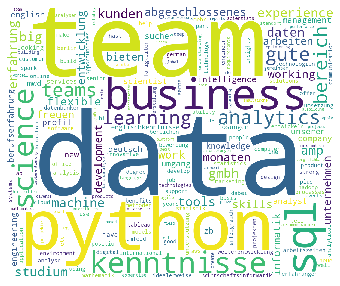

In [29]:
# Words cloud

term_total_freq = dtm_all.sum(axis=0).sort_values(ascending=False)

wordcloud = WordCloud( 
                       background_color='white',
                       width=1200,
                       height=1000,
                       random_state=50).generate_from_frequencies(term_total_freq)

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud)
plt.axis('off')

plt.savefig('./figs/jobsposts_wordcloud.png')
plt.show()

In [30]:
# selected features

skills = {'python':'Python', 'r':'R', 'sql':'SQL', 'java':'Java', 'excel':'Excel', 
          'tableau':'Tableau', 'spark':'Spark', 'hadoop':'Hadoop'}

In [31]:
vectorizer = CountVectorizer(
                             stop_words=stop_words, 
                             ngram_range = (1,1),
                             token_pattern=r'\w+',
                             analyzer='word',
                             vocabulary=skills.keys(),
                             binary=True)

freq = vectorizer.fit_transform(corpus).toarray()
terms = vectorizer.get_feature_names()

# Document-term matrix for selected features
dtm = pd.DataFrame(freq, columns = terms, index = df.index)

In [32]:
dtm['position']=df.position

In [33]:
dtm.shape

(1298, 9)

In [34]:
dtm.head()

,python,r,sql,java,excel,tableau,spark,hadoop,position
0,0,0,0,0,1,1,0,0,data analyst
1,0,0,0,0,0,0,0,0,data analyst
2,0,1,1,0,0,1,0,0,data analyst
3,0,1,1,0,0,0,0,0,data analyst
4,1,0,1,0,0,0,0,0,data analyst


In [35]:
# % of jobs where skills are demanded

skills_by_position = dtm.groupby(['position']).sum(axis=0)/dtm.groupby(['position']).count()*100
skills_by_position = skills_by_position.sort_values(by=list(skills.keys()), ascending=False)

skills_by_position.index = skills_by_position.index.map({'data scientist':'Data Scientist', 'data engineer':'Data Engineer', 
                                                         'data analyst':'Data Analyst', 'bi analyst':'BI Analyst'})
skills_by_position

,python,r,sql,java,excel,tableau,spark,hadoop
position,,,,,,,,
Data Scientist,76.985743,56.619145,42.362525,18.533605,3.462322,8.350305,19.755601,17.107943
Data Engineer,64.155844,11.948052,53.246753,45.714286,2.077922,12.207792,40.779221,32.727273
Data Analyst,37.386018,31.914894,52.887538,7.294833,21.276596,28.571429,5.167173,5.775076
BI Analyst,24.731183,15.053763,72.043011,5.376344,16.129032,41.935484,0.000000,0.000000


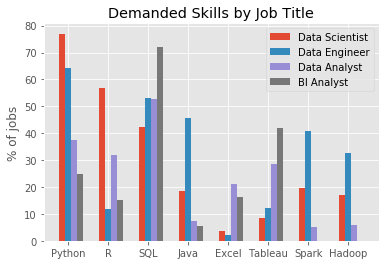

In [36]:
w = 0.15
i=0

for pos in skills_by_position.index:
    
    plt.bar([x+i*w for x in range(len(skills))], skills_by_position.loc[pos, skills], width=w, label=pos)
    i+=1

plt.xticks([x+w for x in range(len(skills))], skills.values())
plt.ylabel('% of jobs')
plt.title('Demanded Skills by Job Title')
plt.legend()
plt.grid(True)
plt.savefig('./figs/demanded_skills.png');

> Python and SQL are the most commonly demanded skills for Data Science, Data Engineer and Data Analyst role types.
 
> SQL, Tableau and Python are most demand skills for for BI Analyst role.
 
> SQL, Python and R are most demand for Data Analyst role.